In [1]:
# in this notebook we will generate chart to display memory usage by different simulation scenarios
# scenario_no = [total used memory [GB], texture memory[MB], mesh memory[KB], time to spawn[ms] ]
scenario_0 = [1.14, 154.8, 213.7, 0]
scenario_32 = [1.16, 145.6, 213.7, 42]
scenario_64 = [1.19, 145.6, 213.7, 166]
scenario_128 = [1.32, 145.6, 213.7, 757]
scenario_256 = [1.71, 145.6, 213.7, 2959]
scenario_512 = [3.40, 145.6, 213.7, 10376]
scenario_1024 = [13.18, 135.5, 213.7, 61494]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def generate_chart(scenario_numbers, total_memory_values, time_to_spawn_values, yLabel1, yLabel2, xlabel,title, bar_width=0.4, figsize=(7, 5), total_memory_color='b', time_to_spawn_color='r', grid_alpha=0.0,fontSize=8):
    # Create a single line chart for memory usage
    # Make it logarithmic
    fig, ax1 = plt.subplots(figsize=figsize)

    # Set the x-axis ticks to be the scenario numbers
    index = np.arange(len(scenario_numbers))

    # Plot total memory on the primary y-axis
    bars1 = ax1.bar(index, total_memory_values, bar_width, color=total_memory_color)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(yLabel1, color='black')
    ax1.tick_params(axis='y', colors='black')  # Set tick_params color to black
    ax1.set_xticks(index)
    ax1.set_xticklabels(scenario_numbers)
    ax1.set_title(title)

    # Display the memory usage as values on top of each bar
    for bar in bars1:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=fontSize)

    # Set gridlines to black for the first subplot
    ax1.grid(True, linestyle='--', alpha=grid_alpha, color='black')

    # Create a second subplot for time to spawn
    ax2 = ax1.twinx()
    ax2.set_ylim(0, np.max(time_to_spawn_values) * 1.1)
    # Plot time to spawn on the secondary y-axis
    bars2 = ax2.bar(index + bar_width, time_to_spawn_values, bar_width, color=time_to_spawn_color)
    ax2.set_ylabel(yLabel2, color='black')
    ax2.tick_params(axis='y', color='black')  # Set tick_params color to black

    # Display the time to spawn as values on top of each bar
    for bar in bars2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom', color='black',fontsize=fontSize)

    # Set gridlines to black for the second subplot
    ax2.grid(True, linestyle='--', alpha=0, color='black')


    # Show the plot
    plt.show()


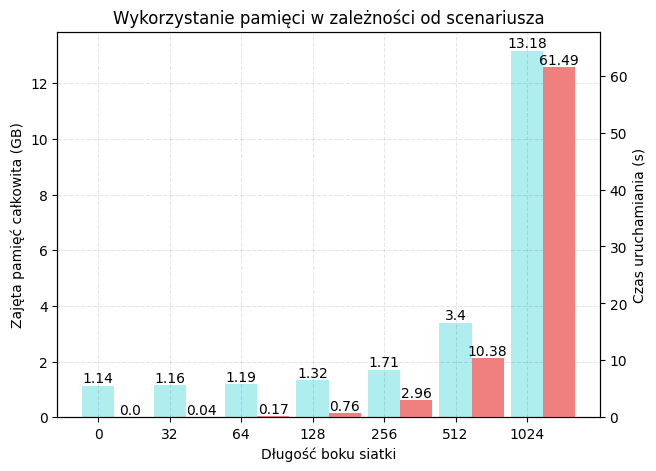

In [3]:
# since the texture memory and mesh memory does not change that much, we will only generate chart from total and time
import matplotlib.pyplot as plt
import numpy as np

# data to plot
n_groups = 7
total_memory = [scenario_0[0], scenario_32[0], scenario_64[0], scenario_128[0], scenario_256[0], scenario_512[0], scenario_1024[0]]
time_to_spawn_ms = [scenario_0[3], scenario_32[3], scenario_64[3], scenario_128[3], scenario_256[3], scenario_512[3], scenario_1024[3]]
time_to_spawn_s = [x / 1000.0 for x in time_to_spawn_ms]

# Data to plot
n_groups = 7
scenario_no = [0, 32, 64, 128, 256, 512, 1024]

generate_chart(scenario_no, total_memory, time_to_spawn_s, yLabel1='Zajęta pamięć całkowita (GB)', yLabel2='Czas uruchamiania (s)',xlabel='Długość boku siatki',title='Wykorzystanie pamięci w zależności od scenariusza', bar_width=0.45, figsize=(7, 5), total_memory_color='paleturquoise', time_to_spawn_color='lightcoral', grid_alpha=0.1,fontSize=10)

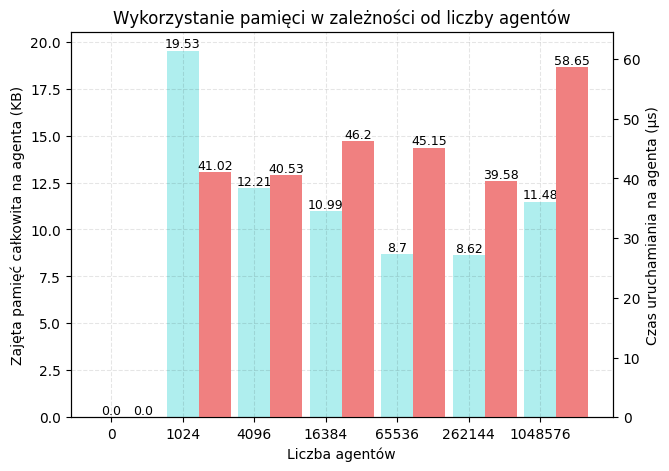

In [4]:
# następnie rysujemy te same wykresy, ale w zależności od ilości agentów
agentCount = [0,32*32,64*64,128*128,256*256,512*512,1024*1024]
memory_with_offset = [x-total_memory[0] for x in total_memory]
memory_per_agent = [x/y if y != 0 else 0 for x, y in zip(memory_with_offset, agentCount)]
time_per_agent = [x/y if y != 0 else 0 for x, y in zip(time_to_spawn_s, agentCount)]
memory_per_agent=[x*1000*1000 for x in memory_per_agent]
time_per_agent=[x*1000*1000 for x in time_per_agent]

generate_chart(agentCount, memory_per_agent, time_per_agent, yLabel1='Zajęta pamięć całkowita na agenta (KB)', yLabel2='Czas uruchamiania na agenta (μs)',xlabel='Liczba agentów',title='Wykorzystanie pamięci w zależności od liczby agentówWykorzystanie pamięci w zależności od liczby agentów', bar_width=0.45, figsize=(7, 5), total_memory_color='paleturquoise', time_to_spawn_color='lightcoral', grid_alpha=0.1,fontSize=9)
